In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [50]:
# count row in dataset
df.shape[0]

918

In [51]:
# cheking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [52]:
# convert Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope into numeric
# using labelencoder()

encode = LabelEncoder()

for column in df.columns:
    if df[column].dtype == np.number: continue
    df[column]= encode.fit_transform(df[column])

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_844/3669476076.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number: continue


In [53]:
df.head(5)
# Sex column, 1 is Male and 0 is Female
# ChestPainType column, 0 for ASY, 1 for ATA, 2 for NAP, 3 for TA
# RestingECG column, 0 for LVH, 1 for Normal, 2 for ST, 
# ExerciseAngina column, 0 for N, 1 for Y
# ST_slope column, 0 for down, 1 for flat, 2 for up

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,0.0,2,0
1,21,0,2,55,40,0,1,82,0,1.0,1,1
2,9,1,1,31,141,0,2,25,0,0.0,2,0
3,20,0,0,39,72,0,1,34,1,1.5,1,1
4,26,1,2,49,53,0,1,48,0,0.0,2,0


In [54]:
# find correlation to get features for label prediction
corr = df.corr()
corr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.274459,-0.042942,0.198039,-0.007484,-0.383374,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.018717,-0.190713,0.120076,0.071552,-0.189878,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.011818,0.013115,-0.073151,-0.072537,0.291560,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.274459,0.018717,-0.011818,1.000000,0.113785,0.064806,0.026082,-0.109674,0.158825,0.181538,-0.074377,0.113658
Cholesterol,-0.042942,-0.190713,0.013115,0.113785,1.000000,-0.188082,-0.177116,0.175997,0.016763,0.066441,0.063680,-0.138663
FastingBS,0.198039,0.120076,-0.073151,0.064806,-0.188082,1.000000,0.087050,-0.131018,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.026082,-0.177116,0.087050,1.000000,-0.179168,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.383374,-0.189878,0.291560,-0.109674,0.175997,-0.131018,-0.179168,1.000000,-0.376149,-0.164617,0.346587,-0.402627
ExerciseAngina,0.215793,0.190664,-0.354727,0.158825,0.016763,0.060451,0.077500,-0.376149,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.181538,0.066441,0.052698,-0.020438,-0.164617,0.408752,1.000000,-0.501921,0.403951


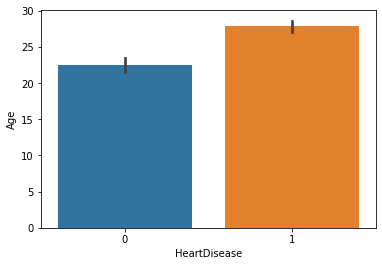

In [55]:
# Visualize Heart Disease from Age
sns.barplot(x='HeartDisease', y='Age', data=df)
plt.show()

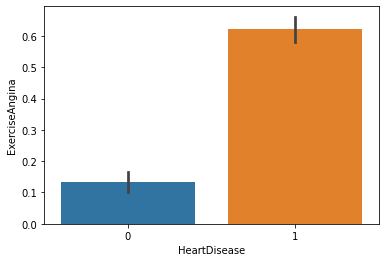

In [56]:
# Visualize Heart Disease and ExerciseAngina
sns.barplot(x='HeartDisease', y='ExerciseAngina', data=df)
plt.show()

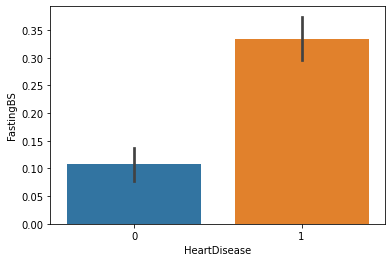

In [57]:
# Visualisze Heart Disease and FastingBS
sns.barplot(x='HeartDisease', y='FastingBS', data=df)
plt.show()

In [58]:
# Make Feature and label for training and testing data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Spliting Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [59]:
# make model using RandomForestClassifier()

rdf_model = RandomForestClassifier().fit(X_train, y_train)

#peformance model training

y_train_pred1 = rdf_model.predict(X_train)
print('Classification Report Training Model (Random Forest):')
cr = classification_report(y_pred, y_train_pred1)
print(cr)

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [60]:
# peformance model testing
y_test_pred1 = rdf_model.predict(X_test)
print('Classification Report Testing Model (Random Forest):')
cr = classification_report(y_test, y_test_pred1)
print(cr)

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        77
           1       0.85      0.88      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [61]:
# make model prediction using logistic regression algorithm

log_model = LogisticRegression().fit(X_train, y_train)
y_train_pred2 = log_model.predict(X_train)
print('Classification Report Training Model (Logistic Regression):')
cr = classification_report(y_train, y_train_pred2)
print(cr)

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       333
           1       0.86      0.86      0.86       401

    accuracy                           0.85       734
   macro avg       0.85      0.85      0.85       734
weighted avg       0.85      0.85      0.85       734



C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
# peformance testing model in logistic regression
y_test_pred2 = log_model.predict(X_test)
print('Classification Report Testing Model (Logistic Regression):')
cr = classification_report(y_test, y_test_pred2)
print(cr)

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        77
           1       0.85      0.87      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



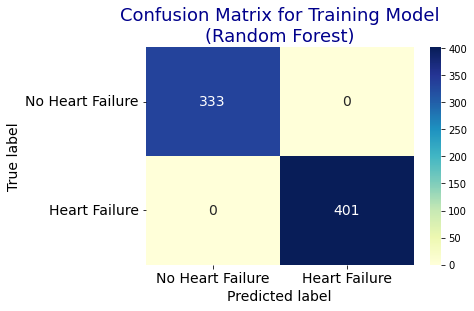

In [83]:
# Form confusion matrix as Dataframe in RandomForest algorithm
# confusion matrix is use to know how much exactly true label and predicted label from machine learning model

confusion_matrix_df1_train = pd.DataFrame((confusion_matrix(y_train, y_train_pred1)), 
                       ('No Heart Failure', 'Heart Failure'),('No Heart Failure', 'Heart Failure'))
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df1_train, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)
plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

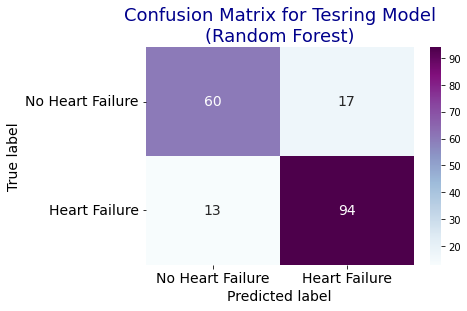

In [84]:
confusion_matrix_df1_test = pd.DataFrame((confusion_matrix(y_test, y_test_pred1)), 
                       ('No Heart Failure', 'Heart Failure'),('No Heart Failure', 'Heart Failure'))
# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df1_test, annot=True, annot_kws={'size': 14}, fmt='d', cmap='BuPu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)
plt.title('Confusion Matrix for Tesring Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

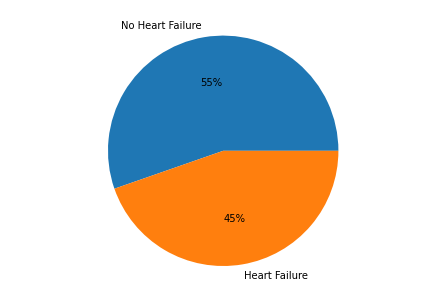

In [85]:
# prosentase heart failure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # add_axes() dengan parameter [left, bottom, width, height] 
ax.axis('equal')
labels = ['No Heart Failure', 'Heart Failure']
heart_disease = df.HeartDisease.value_counts()
ax.pie(heart_disease, labels=labels, autopct='%.0f%%')
plt.show()

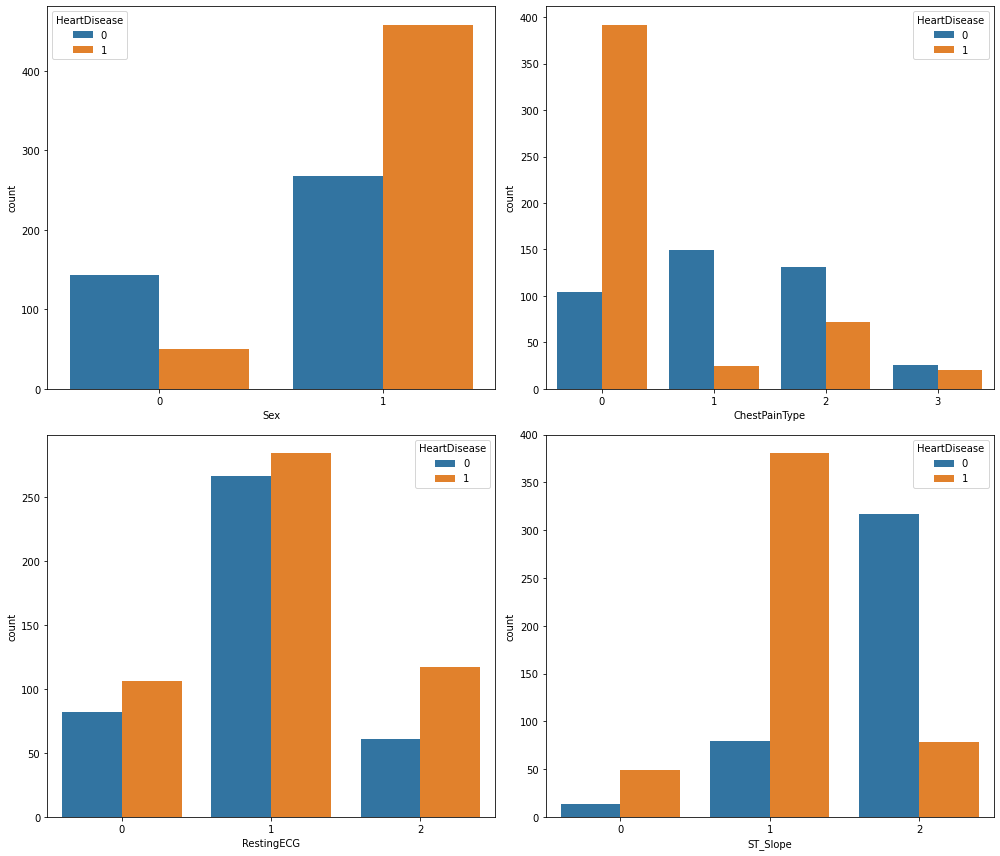

In [88]:
# Exploratory Data Analysis
fig, ax = plt.subplots(2, 2, figsize=(14,12))
sns.countplot(data=df, x='Sex', hue='HeartDisease', ax=ax[0][0])
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', ax=ax[0][1])
sns.countplot(data=df, x='RestingECG', hue='HeartDisease', ax=ax[1][0])
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease', ax=ax[1][1])
plt.tight_layout()
plt.show()

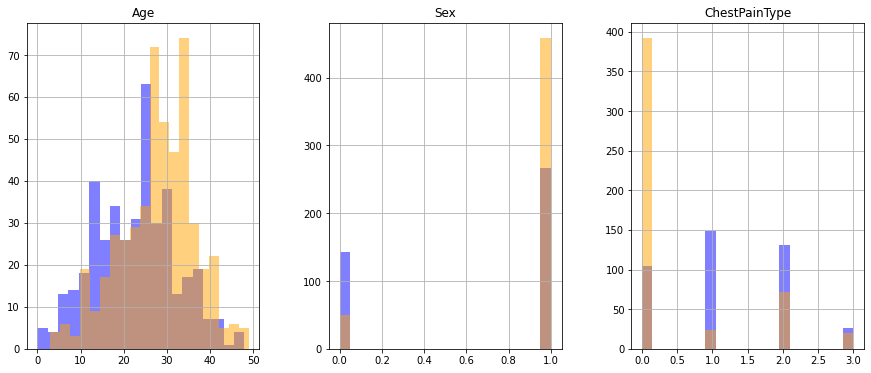

In [92]:
categorical_features = ['Age','Sex','ChestPainType']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.HeartDisease == 0][categorical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.HeartDisease == 1][categorical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()